In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import seaborn as sns

# Load your dataset from a CSV file
data = pd.read_csv('port2.csv')  # Replace 'your_file.csv' with your actual file path

# Step 1: Encode categorical variables
label_encoder_type = LabelEncoder()
label_encoder_size = LabelEncoder()

data['Port_Type'] = label_encoder_type.fit_transform(data['Port_Type'])  # Encode Port_Type
data['Port_Size'] = label_encoder_size.fit_transform(data['Port_Size'])  # Encode Port_Size

# Step 2: Bin the Capacity variable
bins = [0, 50, 100, 150, 200, 300]  # Define your bins
labels = [0, 1, 2, 3, 4]  # Labels for the binned values
data['Capacity_Binned'] = pd.cut(data['Capacity'], bins=bins, labels=labels, right=False)

# Step 3: Define features (X) and target (y)
X = data.drop(['Capacity', 'Capacity_Binned'], axis=1)  # Features
y = data['Capacity_Binned']  # Target (binned Capacity)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.67      0.80      0.73         5
           2       1.00      0.75      0.86         4
           3       1.00      0.60      0.75         5
           4       0.80      1.00      0.89         8

    accuracy                           0.83        30
   macro avg       0.87      0.81      0.82        30
weighted avg       0.86      0.83      0.83        30



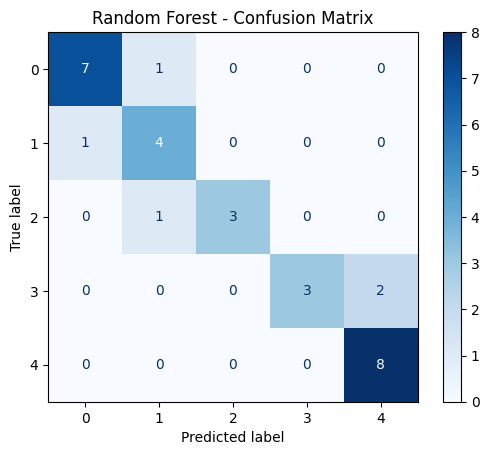

In [3]:
# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

print("\nRandom Forest - Classification Report:")
print(rf_class_report)

# Confusion Matrix for Random Forest
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=rf_model.classes_)
rf_disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()
